In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")
df.head()

,index,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [3]:
df.isnull().sum()

index      0
Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

index      0
Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [6]:
df.drop(['index','Address'], axis=1 , inplace=True)

In [8]:
df['Zip_nume'] = df['Zip'].apply(lambda x: ''.join(filter(str.isdigit, x)))

In [9]:
df.drop(['Zip'], axis=1 , inplace=True)

In [10]:
df.head()

,Price,Area,Room,Lon,Lat,Zip_nume
0,685000.0,64,3,4.907736,52.356157,1091
1,475000.0,60,3,4.850476,52.348586,1059
2,850000.0,109,4,4.944774,52.343782,1097
3,580000.0,128,6,4.789928,52.343712,1060
4,720000.0,138,5,4.902503,52.410538,1036


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x800 with 0 Axes>

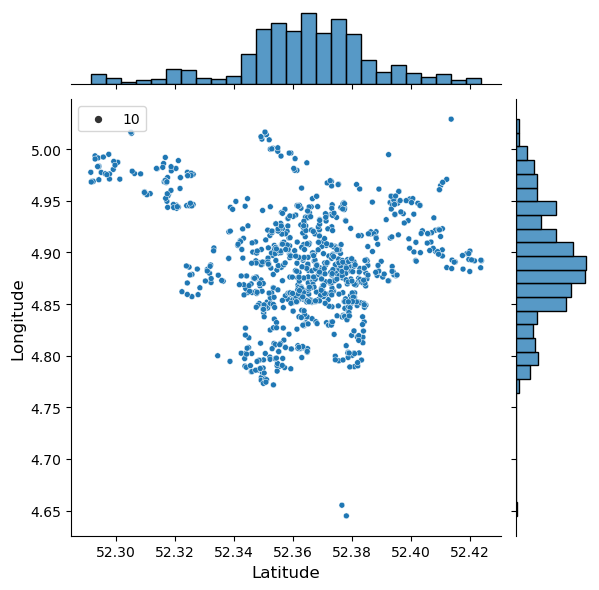

In [11]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.jointplot(x=df['Lat'], y=df['Lon'], size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [13]:
df.dtypes

Price       float64
Area          int64
Room          int64
Lon         float64
Lat         float64
Zip_nume     object
dtype: object

In [14]:
X,y=df.drop(['Price'],axis=1),df.Price
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [17]:
reg.score(X_test,y_test)

0.8012222453266817

In [18]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.000156, n_iterations=100000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            y_pred = self.predict(X)
            error = y_pred - y
            gradient = np.dot(X.T, error) / len(X)
            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * np.mean(error)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [19]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

In [21]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 295019.3777042316
Testing RMSE: 252832.91417092923
